<a href="https://colab.research.google.com/github/Masoomas98/DSPS_MSarfraz/blob/main/Homeworks/Homework4/HMW4_MWrotCurve_instructions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

prepared by federica b bianco @fedhere
for UDel DSPS PHYS 461/661

# testing the "significance" of Dark Matter

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy import stats
import pandas as pd

#package I will use for constants and units conversion
import astropy
from astropy.constants import G

#package used to display latex formuale
from IPython.display import Latex



In 1970 Vera Rubin published a seminal paper: she measured the rotational speed of HII regions in several galaxies and how it changed as a function of distance to the center of the galaxy. If we believe Newtonian gravity (or GR) we expect that _once all of the mass is included_, i.e. at a radius distance from the center of the galaxy larger than the radius of the galaxy itself, the rotational speed will be proportional to $v\propto\frac{1}/{r}$

## Propagation of  uncertainties rules

below are the basic rules for propagation of uncertainties - use [this as reference](https://github.com/fedhere/DSPS/blob/master/resources/Managing%20Errors%20and%20Uncertainty.pdf)




$$
\begin{eqnarray}
z = x  \pm y  ~| & ~  &dz = \sqrt{dx^2 + dy^2}
\\
z = x * y  ~| & ~& dz = |xy|  \sqrt{\left(\frac{dx}{x}\right)^2 +
                                \left(\frac{dy}{y}\right)^2} \\
z = x / y  ~| & ~& dz = \left|\frac{x}{y}\right| \sqrt{\left(\frac{dx}{x}\right)^2 +
                                                   \left(\frac{dy}{y}\right)^2} \\
z = x^n ~| & ~& dz = |n| ~ x^{n-1}  dx \\
z = \mathrm{c}x ~| & ~& dz = |\mathrm{c}| ~dx \\
z = f(x, y) ~| & ~& dz = \sqrt{\left(\frac{\partial f}{\partial x}\right)^2 dx^2 +\left(\frac{\partial f}{\partial y}\right)^2 dy^2} \\
\end{eqnarray}
$$


# let's assume a Newtonian framework:
the velocity of a body in orbit depends only on the gravitational field of the mass that attracts it, and we can assume that mass is concentrated in the center of mass of (the center for simplicity) the system

with G the gravitational constant, $r$ the radius, and $m(r)$ the mass contained within that radius we have the orbital velocity $v$:



$v^2 = \frac{G \cdot m(r)}{r}$


Derive this $v\propto\frac{1}{r}$ from Newron's law $F~=~\frac{GMm}{r^2}$. Write each formula and describe each step. You can use latex (you really just need to know ```\frac{}``` and ```^```) and this reference
https://www.physicsclassroom.com/calcpad/circgrav

We will start with the gravitational force and centripetal force, as gravitational force provides the necessary centripetal force to keep the objects in an orbit.


Gravitational force  Fg =  $\frac{GMm}{r^2}$ <br>
Centripetal force Fc = $\frac{mv^2}{r}$ <br>

* Fg is the gravitational force between two objects.
* G is the gravitational constant.
* M is the mass of the central body (e.g., a planet).
* m is the mass of the orbiting body (e.g., a satellite).
* r is the distance between the centers of the two objects.
* Fc is the centripetal force.
* v is the orbital velocity.

Equating both forces to get the orbital velocity: <br>
$\frac{GMm}{r^2}$ =$\frac{mv^2}{r}$ <br>
m and r cancel and we are left with: <br>
$\frac{GM}{r}$ =${v^2}$ <br>
this implies : <br>
 ${v^2}$ = $\frac{Constant}{r}$ <br>
 ${v}$ ∝ $\frac{1}{√r}$ <br>
This implies that at larger distances the velocity varies at 1/sqrt (r).




## M31 rotational curve

### data ingestion
( I store the original paper as a link on another computer now I have to find it again :-( - sorry I will updat the reference )

Get the data from the github repository https://github.com/fedhere/DSPS/tree/master/HW4 : there are 2 files: mw.csv and m31.csv. Start with M31, the Andromeda galaxy, Vera Rubin's original target.

Note that the data contains 2 types of uncertainties: one significantly smaller than the other. The ```dv``` uncertainty is the propagation of the uncertainty in the location of the HII line. The uncertainty called ```err``` if the full error budget:  including _all_ sources of uncertainty and not just the uncertainty in measuring the location of the line. Retain both, you will test your hypothesis with each one to see if it matters which uncertainty you choose

In [ ]:
m31 = pd.read_csv('https://raw.githubusercontent.com/fedhere/DSPS_FBianco/main/HW4/m31.csv', sep=',', skiprows=1)

In [ ]:
m31.head()

,#R(kpc,V(km/s),St.dev.,St.error
0,0.100,183.939,0.000,0.000
1,0.120,190.710,10.265,12.191
2,0.144,204.141,22.634,21.808
3,0.173,207.601,4.573,4.200
4,0.207,210.188,3.943,3.258


In [ ]:
m31.rename({"#R(kpc":"r", "V(km/s)":"v", "St.dev.":"dv", "St.error":"err"}, axis=1, inplace = True)

In [ ]:
m31.head()

,r,v,dv,err
0,0.100,183.939,0.000,0.000
1,0.120,190.710,10.265,12.191
2,0.144,204.141,22.634,21.808
3,0.173,207.601,4.573,4.200
4,0.207,210.188,3.943,3.258


# exploratory data analysis
proceed with at least a few basic exploratory tasks

In [ ]:
m31.shape

(55, 4)

the dataset m31 has 55 rows and 4 columns decribing the distance, velocity, standard deviation and error.

In [ ]:
m31.describe()

,r,v,dv,err
count,55.000000,55.000000,55.000000,55.000000
mean,205.853182,226.079255,55.034818,16.165855
std,415.523904,42.799892,49.254792,14.876951
min,0.100000,121.974000,0.000000,0.000000
25%,1.177000,208.894500,11.945500,3.224000
50%,13.737000,229.124000,30.697000,12.065000
75%,161.675000,244.102500,99.980000,23.641000
max,1887.071000,414.942000,147.835000,54.110000


Text(0.5, 1.0, ' Rotational curves for galaxy M31')

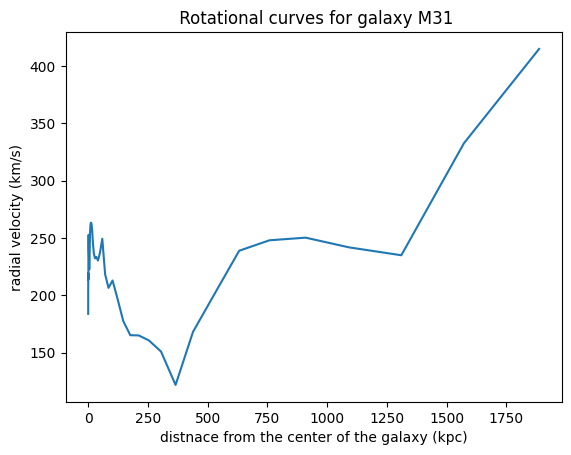

In [ ]:
plt.plot(m31['r'],m31['v'])
plt.xlabel("distnace from the center of the galaxy (kpc)")
plt.ylabel("radial velocity (km/s)")
plt.title(" Rotational curves for galaxy M31")

## Figure 1:
Plotted the raw data's rotational velocity vs. the distance just for visualizing the data

from https://en.wikipedia.org/wiki/Andromeda_Galaxy get the extent of the luminous component of M31 (Andromeda). The distance of the Galaxy multiplied by the angular size will give you this information from basic trigonometry (make sure you convert the units properly, using astropy). Make sure you include the uncertainties! uncertainties in the distance will give you the uncertainty in the size
   


In [ ]:
theta = 3.167 #degrees
from astropy import units as u
theta_d = theta *u.degree
r = 765 * u.kiloparsec #kpc
r_err = 28*u.kiloparsec
m31Size =(r * np.sin(theta_d))/2
m31Size

<Quantity 21.13176145 kpc>

In [ ]:
print("Angular Size of the visible component of Andromeda: {:.2f}".format(theta_d.to(u.rad)  ))

Angular Size of the visible component of Andromeda: 0.06 rad


Please make sure you print a sensible number of decimal digits! you have a  number of significant digits set by the number of digit in the info you get from wikipedia

The distance, from Wikipedia, will have an uncertainty. Convert both to kiloparsecs Kpc

In [ ]:
m31SizeError = m31Size*(np.sqrt((r_err/r)**2))
print("Size of the visible component of Andromeda: " +
      r"{:.0f} +/- {:2.1f}".format(m31Size, m31SizeError))#, m31SizeError


Size of the visible component of Andromeda: 21 kpc +/- 0.8 kpc


Print the distance like I printed the angular size.

To get the physical size of the visible component of andtomeda you can use simple trigonometry: $y = r * sin(\alpha) ~ \sim ~ r \alpha $ for small angles


Print the physical size of the Andromeda galaxy (remember decimal digits, proper formatting etc etc).


done earlier!


### find the first measurement  in your data table that includes all the luminous mass.

What is the smallest radius in your data where the luminous mass is completely included and what is the velocity at that radius?
You can do it by broadcasting (see homework 3)

In [ ]:
# getting rid of all the r values less than the size
data_m31 = m31[m31['r'] >= m31Size].copy()
data_m31.head()

,r,v,dv,err
30,23.738,236.511,11.729,1.580
31,28.485,232.335,16.577,2.106
32,34.182,233.530,27.353,3.826
33,41.019,230.444,52.432,9.815
34,49.222,237.069,109.381,23.924


In [ ]:
small_r_indx = data_m31['r'].idxmin()
smallest_r_value = m31.iloc[small_r_indx, 0]  # 0 represents the first column (r)
associated_v_value = m31.iloc[small_r_indx, 1]  # 1 represents the second column (v)

print("Smallest 'r' value:", smallest_r_value)
print("Associated 'v' value:", associated_v_value)

Smallest 'r' value: 23.738
Associated 'v' value: 236.511


We expect the velocity to decrease as 1/r if all mass is included: the velocity at a radius twice as far as the radius that includes all the mass should be a factor 2 slower, three times as far a factor 3 slower.

write a function that

1. finds the smallest radius in the dataset that is at least N times the radius of the visible galaxy,

2. takes as arguments:
    - the data and
    - N
    - the size of the luminous component of the galaxy

2. Returns the value of the radius and its uncertainty and the velocity and its uncertainty

In [ ]:
# first measurement including all mass
# x = m31 , s= size
def getradii(x,N,s):

  """
  defining a function to get the smallest radius, broadcasting by a scaling factor on the distance from the center
  parameters:
  x = dataset for the galaxy
  N = scalig factor, 1 ,2 , 3 etc etc
  s = size of the luminous part of galaxy

  return:
  the function returns the smallest radius, corresponding velocity, and uncertainities in velocity and radius respectively
  """
  sm_rad_value = x[x['r']>= N*s]
  r = sm_rad_value.iloc[0][0]
  v = sm_rad_value.iloc[0][1]
  dv = sm_rad_value.iloc[0][2]
  dr = sm_rad_value.iloc[0][3]

  return r, dr,v,dv

In [ ]:
N=1
r,dr,v,dv = getradii(m31,N,m31Size)
print("smallest radius and uncertainty=",r ,"+/-", dr , "kpc")
print("asscoiated velocity and uncertainty=",v ,"+/-", dv ,"km/s", "for N=", N)

smallest radius and uncertainty= 23.738 +/- 1.58 kpc
asscoiated velocity and uncertainty= 236.511 +/- 11.729 km/s for N= 1


### data visualization

make a plot that shows

1. the rotational curve of the galaxy (as a line)

2. each velocity as an errorbar with error equal to err in the same color as the line in 1

3. each velocity as an errorbar with error equal to dv in  the same color but a different line thickness


4. the datapoint corresponding to N=1, 2, 3 each in a different color.

5. add a legend that indicates the meaning of each color (```pl.legend()```)

6. add a text that indicates the velocity and its uncertainty (dv and err) just below the largest errorbar (```pl.text()```)

7. limit the x axis to the "relevant" portion of the data

In [ ]:
r1, dr1, v1, dv1 = getradii(m31,1,m31Size)
r2, dr2, v2, dv2 = getradii(m31,2,m31Size)
r3, dr3, v3, dv3 = getradii(m31,3,m31Size)
r2, dr2, v2, dv2

(49.222, 23.924, 237.069, 109.381)

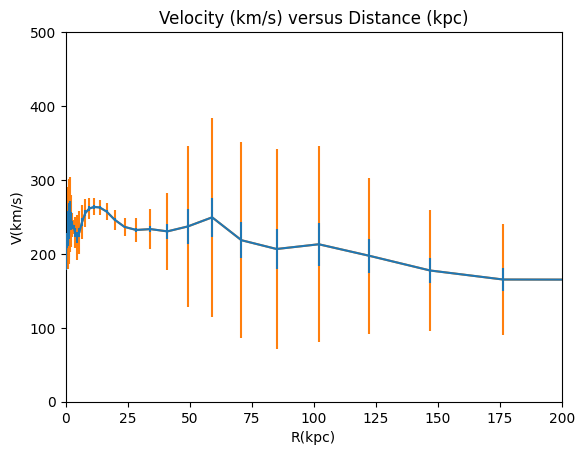

In [ ]:
plt.errorbar(m31['r'],m31['v'], m31['err'], zorder = 10)
plt.errorbar(m31['r'],m31['v'], m31['dv'])
plt.xlim(0,200)
plt.ylim(0,500)
plt.xlabel("R(kpc)")
plt.ylabel("V(km/s)")
plt.title("Velocity (km/s) versus Distance (kpc)")
plt.show()

## Figure 2:
Scaling x and y scaling to get a zoomed in view for the behaviour of rotational velocites plotted as a function of distance alongwith the error bars.

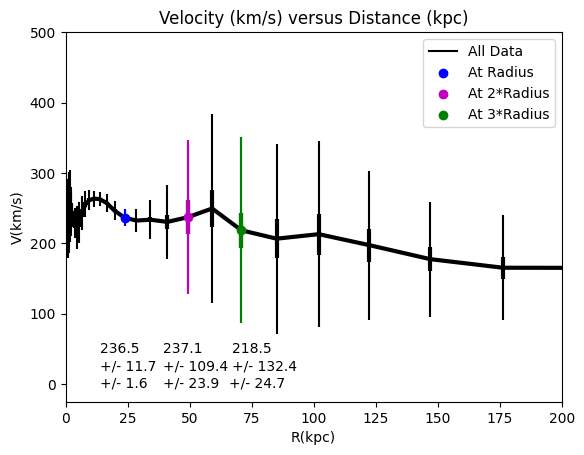

In [ ]:
plt.plot(m31['r'], m31['v'], c = 'k', label = 'All Data')
plt.errorbar(m31['r'], m31['v'], yerr=m31['dv'], c = 'k')
plt.errorbar(m31['r'], m31['v'], yerr=m31['err'], c = 'k', linewidth = 3)
plt.scatter(r1,v1, c = 'b', zorder = 10, label = 'At Radius')
plt.errorbar(r1,v1, yerr=dv1, c = 'b')
plt.errorbar(r2,v2, yerr=dr1, c = 'b', linewidth = 3)
plt.scatter(r2,v2, c = 'm', zorder = 10, label = 'At 2*Radius')
plt.errorbar(r2,v2, yerr=dv2, c = 'm')
plt.errorbar(r2,v2, yerr=dr2, c = 'm', linewidth = 3)
plt.scatter(r3,v3, c = 'g', zorder = 10, label = 'At 3*Radius')
plt.errorbar(r3,v3, yerr=dv3, c = 'g')
plt.errorbar(r3,v3, yerr=dr3, c = 'g', linewidth = 3)
plt.legend(loc = 'upper right')
plt.text(r1-10,45, r"{:.1f}".format(v1))
plt.text(r1-10,20, "+/- {:.1f}".format(dv1))
plt.text(r1-10,-5, "+/- {:.1f}".format(dr1))
plt.text(r2-10,45, r"{:.1f}".format(v2))
plt.text(r2-10,20, "+/- {:.1f}".format(dv2))
plt.text(r2-10,-5, "+/- {:.1f}".format(dr2))
plt.text(r3-4,45, r"{:.1f}".format(v3))
plt.text(r3-4,20, "+/- {:.1f}".format(dv3))
plt.text(r3-5,-5, "+/- {:.1f}".format(dr3))

plt.xlim(0, 200)
plt.ylim(-25, 500)
plt.xlabel("R(kpc)")
plt.ylabel("V(km/s)")
plt.title("Velocity (km/s) versus Distance (kpc)")
plt.show()

## Figure 3:
This plot is reconstructed to verify the rotational velocity curve as calculated by Vera Rubin and co. it clearly depicts that over larger distances, away from the luminous matter the velocity does not decrease as 1/sqrt(r) as proposed by Newtonian dynamics, rather it varies slightly but overall stays constant for greater distances. Further more the scaled distances are also plotted with the uncertainites where the the values give a specific velocity over scaled radius and uncertainity in velocity ad distance respectively.

Write a function that for a given dataset and a given luminous radius and a given N
  
  1) uses the function above to find the radius at least as large as needed and the velocity at that radius,
  
  2) states the expected drop in rotational velocities according to Newton's law $v\propto 1/r$
  
  3) calculates the ratio of radii and the ratio of velocities at N radii from the center N=1 and N=N (input, e.g. 2, 3 etc) with uncertainties,
  
  4) and stated whether that ratio is consistent within the uncertainties with Newton's law $v \propto 1/r$
  
Your function should print

     - the expected ratio based on the radii,
     - the calculated ratio using ```dv```, and its uncertainty, -
     - the 2-$\sigma$ upper and lower limits of the calculated ratio
     - whether the expected ratio is within the $2-\sigma$ of the calculated ratio,
  5) and the same using ```err```  instead of ```dv```

In [ ]:
def vratios(data, N, r):
  """
    Calculate and compare the expected and calculated velocity ratios for N times the luminous radius compared to the luminous radius.
    Parameters:
        data : The galaxy dataset containing radius, velocity, error in veloctiy and radius.
        N: The number multiplied with r for an increment in distance.
        r: The size of luminous radius in kpc.
    Returns:
    nothing expliccitly but it prints out the ratios for v1/vn and sqrt(rn/r1) with uncertainities and
    determines if the exp_ratio lies within a 2-sigma of the calculated one.
  """
  r_1, dr_1, v_1, dv_1=getradii(data,1,r)
  r, dr, v, dv =getradii(data,N,r)
  exp_ratio=np.sqrt(r/r_1)
  # because using v=sqrt(GM/r) , we find the ratio is sqrt(r/r_1) = v_1/v
  ratio_actual = v_1/v
  sigma = ratio_actual*np.sqrt((dv_1/v_1)**2+(dv/v)**2)
  upper_range=ratio_actual+2*sigma
  lower_range=ratio_actual-2*sigma
  agree="" if exp_ratio <= upper_range and exp_ratio >= lower_range else "not"
  print(f"The expected ratio of V for N=1 and V for N={N} is {exp_ratio:.5f}")
  print(f"The calculated ratio of V for N=1 and V for N={N} is {ratio_actual:.5f} +/- {sigma:.2f}")
  print(f"The upper bound of the error range for the calculated ratio is {upper_range:.5f} and the lower bound is {lower_range:.5f}, using twice the uncertainty to create the bounds.")
  print(f"The expected range is {agree} within that given range of the calculated ratio.")

In [ ]:
vratios(m31,1,m31Size)

The expected ratio of V for N=1 and V for N=1 is 1.00000
The calculated ratio of V for N=1 and V for N=1 is 1.00000 +/- 0.07
The upper bound of the error range for the calculated ratio is 1.14027 and the lower bound is 0.85973, using twice the uncertainty to create the bounds.
The expected range is  within that given range of the calculated ratio.


In [ ]:
vratios(m31,2,m31Size)

The expected ratio of V for N=1 and V for N=2 is 1.43998
The calculated ratio of V for N=1 and V for N=2 is 0.99765 +/- 0.46
The upper bound of the error range for the calculated ratio is 1.92355 and the lower bound is 0.07174, using twice the uncertainty to create the bounds.
The expected range is  within that given range of the calculated ratio.


In [ ]:
vratios(m31,3,m31Size)

The expected ratio of V for N=1 and V for N=3 is 1.72798
The calculated ratio of V for N=1 and V for N=3 is 1.08248 +/- 0.66
The upper bound of the error range for the calculated ratio is 2.39835 and the lower bound is -0.23339, using twice the uncertainty to create the bounds.
The expected range is  within that given range of the calculated ratio.


## do the same for the Milky Way. If your functions were create properly you should be able to reuse them seamlessly

In [ ]:
mw = pd.read_csv('https://raw.githubusercontent.com/fedhere/DSPS_FBianco/main/HW4/mw.csv', sep=',', skiprows=1)
mw.head()

,R(kpc),V(km/s),St.dev.,St.error
0,0.010,119.061,41.832,32.714
1,0.012,115.268,35.199,17.100
2,0.014,117.392,35.152,14.429
3,0.017,118.475,35.252,14.870
4,0.021,110.386,33.817,14.427


In [ ]:

mw.rename({"R(kpc)":"r", "V(km/s)":"v", "St.dev.":"dv", "St.error":"err"}, axis=1, inplace = True)

In [ ]:
mw.head()

,r,v,dv,err
0,0.010,119.061,41.832,32.714
1,0.012,115.268,35.199,17.100
2,0.014,117.392,35.152,14.429
3,0.017,118.475,35.252,14.870
4,0.021,110.386,33.817,14.427


In [ ]:
#Data exploration
mw.describe()

,r,v,dv,err
count,64.000000,64.000000,64.000000,64.000000
mean,142.281500,187.101219,48.249063,19.003297
std,348.144773,52.161901,41.255286,23.513466
min,0.010000,93.042000,3.370000,0.868000
25%,0.177250,138.676250,12.585500,2.709750
50%,3.133500,204.576000,35.288500,13.923000
75%,55.298250,235.920500,68.412750,24.791250
max,1682.532000,255.300000,165.096000,110.484000


In [ ]:
mw.shape

(64, 4)

Text(0.5, 1.0, ' Rotational curves for Milky way galaxy')

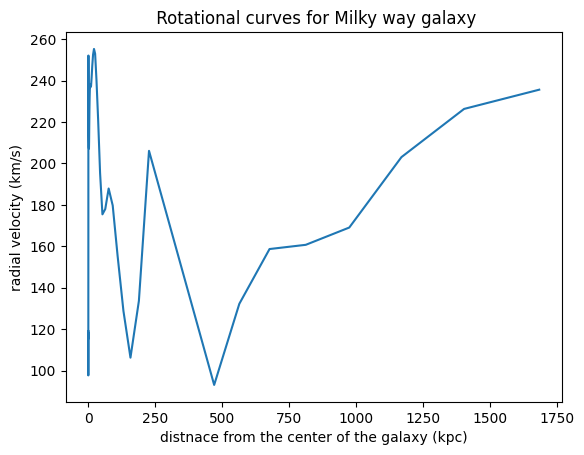

In [ ]:
plt.plot(mw['r'],mw['v'])
plt.xlabel("distnace from the center of the galaxy (kpc)")
plt.ylabel("radial velocity (km/s)")
plt.title(" Rotational curves for Milky way galaxy")

## Figure 4:
A visualization of milky way rotational curves

In [ ]:
mwSize = (26.8 * u.kiloparsec)/2
mwSize
mwSizeError = 1.1 *u.kiloparsec

In [ ]:
print("Size of the visible component of Milky way: " +
      r"{:.1f} +/- {:2.1f}".format(mwSize, mwSizeError))#, mwSizeError

Size of the visible component of Milky way: 13.4 kpc +/- 1.1 kpc


In [ ]:
data_mw = mw[mw['r'] >= mwSize].copy()
data_mw.head()

,r,v,dv,err
40,14.698,247.075,42.102,4.069
41,17.637,252.483,49.524,6.235
42,21.165,255.300,58.570,9.816
43,25.398,252.966,66.790,14.565
44,30.477,240.165,74.879,20.538


In [ ]:
small_r_idx = data_mw['r'].idxmin()
smallest_r = mw.iloc[small_r_idx, 0]  # 0 represents the first column (r)
associated_v = mw.iloc[small_r_idx, 1]  # 1 represents the second column (v)

print("Smallest 'r' value:", smallest_r)
print("Associated 'v' value:", associated_v)

Smallest 'r' value: 14.698
Associated 'v' value: 247.075


In [ ]:
N=1
r,dr,v,dv = getradii(mw,N,mwSize)
print("smallest radius and uncertainty=",r ,"+/-", dr , "kpc")
print("asscoiated velocity and uncertainty=",v ,"+/-", dv ,"km/s", "for N=", N)

smallest radius and uncertainty= 14.698 +/- 4.069 kpc
asscoiated velocity and uncertainty= 247.075 +/- 42.102 km/s for N= 1


In [ ]:
r1, dr1, v1, dv1 = getradii(mw,1,mwSize)
r2, dr2, v2, dv2 = getradii(mw,2,mwSize)
r3, dr3, v3, dv3 = getradii(mw,3,mwSize)
r2, dr2, v2, dv2

(30.477, 20.538, 240.165, 74.879)

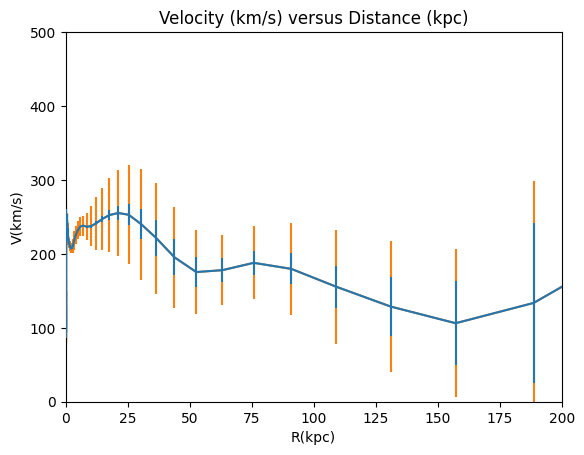

In [ ]:
plt.errorbar(mw['r'],mw['v'], mw['err'], zorder = 10)
plt.errorbar(mw['r'],mw['v'], mw['dv'])
plt.xlim(0,200)
plt.ylim(0,500)
plt.xlabel("R(kpc)")
plt.ylabel("V(km/s)")
plt.title("Velocity (km/s) versus Distance (kpc)")
plt.show()

## Figure 5:
A visualisation of milky way rotational curve

https://en.wikipedia.org/wiki/Milky_Way
    

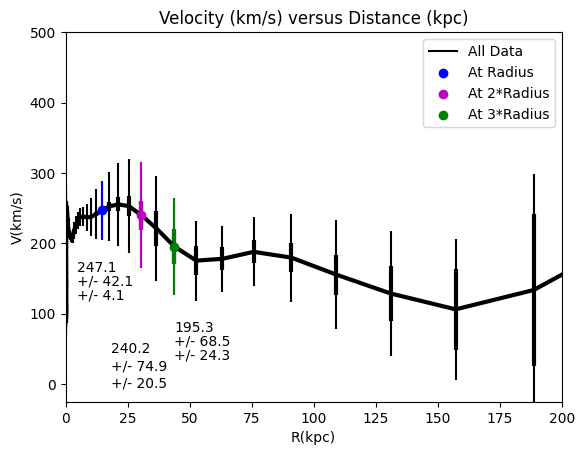

In [ ]:
plt.plot(mw['r'], mw['v'], c = 'k', label = 'All Data')
plt.errorbar(mw['r'], mw['v'], yerr=mw['dv'], c = 'k')
plt.errorbar(mw['r'], mw['v'], yerr=mw['err'], c = 'k', linewidth = 3)
plt.scatter(r1,v1, c = 'b', zorder = 8, label = 'At Radius')
plt.errorbar(r1,v1, yerr=dv1, c = 'b')
plt.errorbar(r2,v2, yerr=dr1, c = 'b', linewidth = 3)
plt.scatter(r2,v2, c = 'm', zorder = 8, label = 'At 2*Radius')
plt.errorbar(r2,v2, yerr=dv2, c = 'm')
plt.errorbar(r2,v2, yerr=dr2, c = 'm', linewidth = 3)
plt.scatter(r3,v3, c = 'g', zorder = 8, label = 'At 3*Radius')
plt.errorbar(r3,v3, yerr=dv3, c = 'g')
plt.errorbar(r3,v3, yerr=dr3, c = 'g', linewidth = 3)
plt.legend(loc = 'upper right')
plt.text(r1-10,160, r"{:.1f}".format(v1))
plt.text(r1-10,140, "+/- {:.1f}".format(dv1))
plt.text(r1-10,120, "+/- {:.1f}".format(dr1))
plt.text(r2-12,45, r"{:.1f}".format(v2))
plt.text(r2-12,20, "+/- {:.1f}".format(dv2))
plt.text(r2-12,-5, "+/- {:.1f}".format(dr2))
plt.text(r3,75, r"{:.1f}".format(v3))
plt.text(r3,55, "+/- {:.1f}".format(dv3))
plt.text(r3,35, "+/- {:.1f}".format(dr3))
plt.xlim(0, 200)
plt.ylim(-25, 500)
plt.xlabel("R(kpc)")
plt.ylabel("V(km/s)")
plt.title("Velocity (km/s) versus Distance (kpc)")
plt.show()

## Figure 6:
This plot for rotational velocity curve for milky way is calculated as a function of radial distance, it clearly depicts that over larger distances, away from the luminous matter the velocity does not decrease as 1/sqrt(r) as proposed by Newtonian dynamics, rather it varies but not as the theorized velocity. Further more the scaled distances are also plotted with the uncertainites where the the values give a specific velocity over scaled radius and uncertainity in velocity ad distance respectively.

In [ ]:
vratios(mw,1,mwSize)

The expected ratio of V for N=1 and V for N=1 is 1.00000
The calculated ratio of V for N=1 and V for N=1 is 1.00000 +/- 0.24
The upper bound of the error range for the calculated ratio is 1.48197 and the lower bound is 0.51803, using twice the uncertainty to create the bounds.
The expected range is  within that given range of the calculated ratio.


In [ ]:
vratios(mw,2,mwSize)

The expected ratio of V for N=1 and V for N=2 is 1.43998
The calculated ratio of V for N=1 and V for N=2 is 1.02877 +/- 0.37
The upper bound of the error range for the calculated ratio is 1.75984 and the lower bound is 0.29771, using twice the uncertainty to create the bounds.
The expected range is  within that given range of the calculated ratio.


In [ ]:
vratios(mw,3,mwSize)

The expected ratio of V for N=1 and V for N=3 is 1.72798
The calculated ratio of V for N=1 and V for N=3 is 1.26489 +/- 0.49
The upper bound of the error range for the calculated ratio is 2.25112 and the lower bound is 0.27867, using twice the uncertainty to create the bounds.
The expected range is  within that given range of the calculated ratio.


# Question no 2:


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(111)
mean = 2
var = 2
std = np.sqrt(var)
# Define the target density function p(x) as gaussian function
def gauss(x):
  """
  defining a gaussian function where mean, standard deviation and variance is already defined.
  parameters :
  x = a point value on the distribution
  return:
   a sample from the distribution
  """
  return np.exp(-0.5*((x-mean)**2)/var)/(std*np.sqrt(2*np.pi))

# Define the proposal distribution q(x' | x) as normal distribution just as our guess
def proposal_distribution(x, var=1):
  """
  defining a proposed normal distribution function where mean is x, standard deviation and variance = 1 is already defined.
  parameters :
  x = mean
  return:
   a sample from the distribution
  """
  return np.random.normal(x, np.sqrt(var))



In [ ]:
x_current = 0
num_samples = 10000
samples = [x_current]

# Run the MCMC sampler
for _ in range(num_samples):
    x_proposed = proposal_distribution(x_current)

    # Calculate the acceptance ratio
    acceptance_ratio = min(1, gauss(x_proposed) / gauss(x_current))

    # Accept or reject the proposed sample
    if np.random.rand() < acceptance_ratio:
        x_current = x_proposed

    samples.append(x_current)


(array([  71.,  433., 1319., 2594., 2891., 1853.,  657.,  154.,   20.,
           9.]),
 array([-2.57203026, -1.48718898, -0.40234771,  0.68249357,  1.76733484,
         2.85217611,  3.93701739,  5.02185866,  6.10669994,  7.19154121,
         8.27638249]),
 <BarContainer object of 10 artists>)

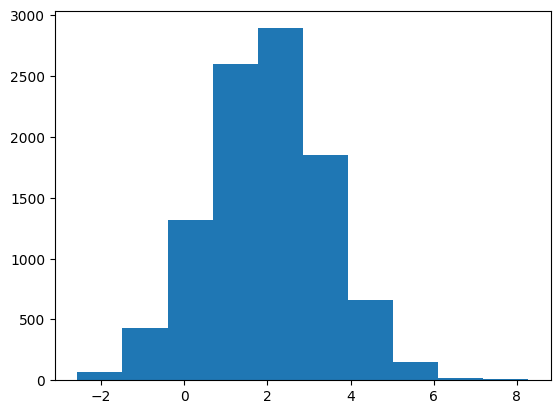

In [ ]:
plt.hist(samples)

## Figure 7:
Just checking if the sampling done resembles gaussian distribution

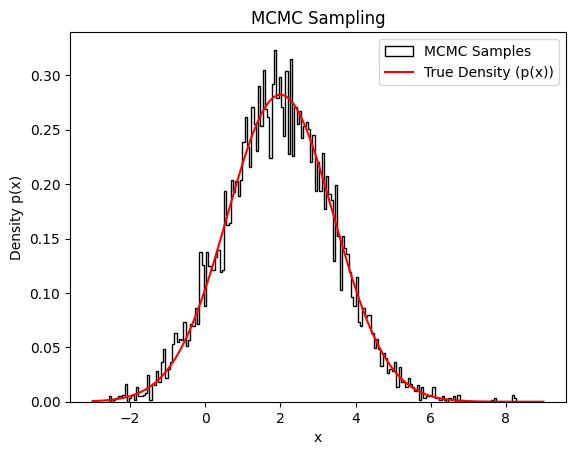

In [ ]:
# Plot the histogram of samples

plt.hist(samples, bins=180, density=True,  label="MCMC Samples", histtype='step', edgecolor='k')
x_range = np.linspace(-3, 9, 10000)
true_density = gauss(x_range)
plt.plot(x_range, true_density, 'r', label="True Density (p(x))")

plt.xlabel('x')
plt.ylabel('Density p(x)')
plt.legend()
plt.title('MCMC Sampling')
plt.show()

## Figure 8:
This plot is a comparison of MCMC sampled data with the gaussian distribution , which looks pretty good in overlapping and the overall shape also agrees with the target distribution